<a href="https://colab.research.google.com/github/aritapia19/coder-DataScience77695/blob/main/ProyectoDS_I_TapiaAriel(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Data Science – Primera Entrega
### EDA sobre Dataset: Plan Canje – Retiro de Equipos

---

## Abstract
En este proyecto trabajé con el dataset **“Plan Canje – Retiro de Equipos”**, que contiene información sobre las órdenes de retiro de equipos gestionadas tanto en tienda como en domicilio, donde se mide el cumplimiento del SLA (Service Level Agreement) de punta a punta.

El objetivo principal es aplicar técnicas de visualización y análisis exploratorio de datos (EDA) para identificar patrones relevantes, relaciones entre variables y posibles anomalías o factores que influyen en el cumplimiento del SLA.

El análisis incluye una limpieza de datos, detección de valores perdidos, y selección de variables relevantes. Luego se desarrollan visualizaciones que permiten explorar tendencias, distribuciones y correlaciones. A partir de estos resultados se busca brindar una interpretación que ayude a comprender mejor el fenómeno analizado y sentar las bases para análisis posteriores como modelado predictivo o segmentación.

---

## Preguntas de interés / Hipótesis

1. **Tipo de retiro vs eficiencia**: ¿Existe relación entre el tipo de retiro (tienda/domicilio) y el cumplimiento del SLA de despacho? ¿Los retiros en domicilio requieren más visitas?

2. **Factores geográficos**: ¿Las localidades y provincias influyen en los tiempos de proceso (Días despacho, Días MB-Mirlog)? ¿Hay regiones con mejor desempeño?

3. **Eficiencia por categoría**: ¿El negocio (Samsung, etc.) y la familia de equipos afectan los tiempos de procesamiento y número de visitas requeridas?

4. **Variabilidad temporal**: ¿Qué variable presenta mayor variabilidad en los tiempos? ¿Existen outliers significativos en Días MB-Mirlog que indiquen cuellos de botella?

5. **Flujo del proceso**: ¿Cómo se relacionan los tiempos entre Master Box → Despacho → Mirlog? ¿Existen correlaciones entre estas etapas?

6. **Estado final vs eficiencia**: ¿El estado en Mirlog (Finalizado/otros) se correlaciona con menores tiempos de proceso y menos visitas?
---








In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# Configuración visual
plt.style.use("default")
pd.set_option("display.max_columns", 50)
sns.set_palette("Set2")

In [3]:
# Cargar dataset
csv_path = "/content/sample_data/Dataset plan canje.csv"
df = pd.read_csv(csv_path, sep=";", encoding="latin1")

/tmp/ipython-input-2665956717.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, sep=";", encoding="latin1")


In [4]:
# Vista inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Dimensiones del dataset: (23487, 46)

Primeras filas:


,Key,KeyB3,Handsetquote Id,Model Name,Imei,Vendor Name,DNI,Address,Sales Man Email,Sales Man Phone,Localidad,Provincia,CP,Negocio,Familia,Tipo retiro,Master Box,Master Box Date,Fecha despacho,Fecha tentativa,Días despacho,SLA despacho,Fecha insumo,Correo 1,Fecha 1° visita,Motivo 1° visita,Estado visita,Días 1° Visita,SLA 1° Visita,SLA E2E,Arribo Mirlog,Estado Mirlog,Días MB-Mirlog,Días Despacho-Mirlog,Últ. correo,Últ. fecha,Últ. Tracking,Últ. Motivo,Visitas,Estado de retiro,Familia (grupos),Estado de retiro (grupos),KeyMultidivice,Multidivice,Validación Cancelados,Agrupador 1er Visita
0,263051446-Samsung-Celulares,263051446-4624118-Celulares,4624118,Samsung-Galaxy Note20 SM-N980F 256GB,"3,57516E+14",Alfio Daniel Lee,31982044.0,AVENIDA RIVADAVIA 7018 Ciudad Autónoma de Bue...,leealfiodaniel@hotmail.com,"5,4113E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051446,2/1/2023,3/1/2023,6/1/2023,1,Ok,NaN,EPSA,4/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,6.0,5.0,EPSA,4/1/2023,2992163,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051446-Samsung,No,NaN,Retirado-Entregado
1,263051490-Samsung-Celulares,263051490-4628675-Celulares,4628675,Samsung-Galaxy J6 SM-J600G 32GB,"3,59225E+14",Mariela Laura Aguirre,26732898.0,JOSE GERVASIO ARTIGAS 582 CABA cp 1406,aguirremarielalaura@gmail.com,"5,41163E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051490,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994856,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051490-Samsung,No,NaN,Retirado-Entregado
2,263051521-Samsung-Celulares,263051521-4626841-Celulares,4626841,Apple-iPhone 8 Plus 64GB,"3,56712E+14",Federico Amor,22849402.0,"Rivera Indarte 175 - 6 ""A"" - CABA - CP: 1406.",famorg@gmail.com,"5,41139E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051521,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994849,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051521-Samsung,No,NaN,Retirado-Entregado
3,263051540-Samsung-Celulares,263051540-4628347-Celulares,4628347,Samsung-Galaxy Note8 SM-N950F DS 64GB,"3,55731E+14",Diana Violeta Lee,32267023.0,"DR F DE ARANGUREN 3333 (local a la calle), Ent...",diduchis@gmail.com,"5,41142E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051540,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994848,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051540-Samsung,No,NaN,Retirado-Entregado
4,263051556-Samsung-Celulares,263051556-4628375-Celulares,4628375,Samsung-Galaxy S20 FE SM-G780F 128GB,"3,50556E+14",Inti Rojas,30059332.0,Renan 1160. CABA. CP 1406,intirojas83@gmail.com,"5,4115E+11",C.A.B.A.,BUENOS AIRES,1406,Samsung,Celulares,Domicilio,263051556,3/1/2023,4/1/2023,9/1/2023,1,Ok,NaN,EPSA,5/1/2023,POD-ENTREGADA,Ok,1.0,Ok,2.0,10/1/2023,Finalizado,5.0,4.0,EPSA,5/1/2023,2994836,POD-ENTREGADA,1,Retirado-Entregado,Celulares+Tablets,Retirado-Entregado,263051556-Samsung,Si,NaN,Retirado-Entregado


In [6]:
# Información básica
print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include="all").T)


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23487 entries, 0 to 23486
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Localidad        23487 non-null  object 
 1   Provincia        23487 non-null  object 
 2   Negocio          23487 non-null  object 
 3   Familia          23487 non-null  object 
 4   Tipo retiro      23487 non-null  object 
 5   Master Box       23487 non-null  int64  
 6   Master Box Date  23487 non-null  object 
 7   Fecha despacho   23487 non-null  object 
 8   Fecha tentativa  23487 non-null  object 
 9   Días despacho    23487 non-null  int64  
 10  SLA despacho     23487 non-null  object 
 11  Estado Mirlog    23487 non-null  object 
 12  Días MB-Mirlog   17277 non-null  float64
 13  Visitas          23487 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.5+ MB
None

Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Localidad,23487,1063,C.A.B.A.,4604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provincia,23487,33,BUENOS AIRES,13501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Negocio,23487,4,Samsung,19131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Familia,23487,7,Celulares,19260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tipo retiro,23487,2,Domicilio,21555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Master Box,23487.0,NaN,NaN,NaN,252187006.098906,31935811.25705,193003497.0,263053457.0,263060984.0,263070798.5,460000174.0
Master Box Date,23487,788,13/2/2023,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha despacho,23487,653,27/2/2023,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fecha tentativa,23487,657,2/3/2023,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Días despacho,23487.0,NaN,NaN,NaN,1.093754,1.636304,-10.0,1.0,1.0,1.0,63.0


In [7]:
# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Localidad             0
Provincia             0
Negocio               0
Familia               0
Tipo retiro           0
Master Box            0
Master Box Date       0
Fecha despacho        0
Fecha tentativa       0
Días despacho         0
SLA despacho          0
Estado Mirlog         0
Días MB-Mirlog     6210
Visitas               0
dtype: int64


In [8]:
# Porcentaje de nulos
print("\nPorcentaje de nulos:")
print((df.isnull().mean()*100).round(2))


Porcentaje de nulos:
Localidad           0.00
Provincia           0.00
Negocio             0.00
Familia             0.00
Tipo retiro         0.00
Master Box          0.00
Master Box Date     0.00
Fecha despacho      0.00
Fecha tentativa     0.00
Días despacho       0.00
SLA despacho        0.00
Estado Mirlog       0.00
Días MB-Mirlog     26.44
Visitas             0.00
dtype: float64


In [9]:
# Duplicados
print("\nCantidad de duplicados:", df.duplicated().sum())


Cantidad de duplicados: 147


In [10]:
# Eliminar filas con al menos un valor negativo en cualquier columna numérica
df = df[~(df.select_dtypes(include='number') < 0).any(axis=1)]


In [11]:
# Verificar si hay valores negativos en cada columna
negativos_despacho = df["Días despacho"] < 0
negativos_mb_mirlog = df["Días MB-Mirlog"] < 0

# Mostrar cuántos valores negativos hay en cada columna
print("Valores negativos en 'Días despacho':", negativos_despacho.sum())
print("Valores negativos en 'Días MB-Mirlog':", negativos_mb_mirlog.sum())


Valores negativos en 'Días despacho': 0
Valores negativos en 'Días MB-Mirlog': 0


## Análisis univariado

*   Variables categóricas:

* *  La mayoría de las órdenes finalizan en el estado *“Retirado – Entregado”*.
* *  **El SLA despacho** y el **SLA E2E** muestran que gran parte de las operaciones se cumplen, pero también existen casos de incumplimiento que requieren análisis.
* * En la variable Tipo retiro, se observa predominancia de un canal sobre el otro (tienda vs domicilio).

*   Variables numéricas:

* * Los **días de despacho** presentan una distribución sesgada, con valores concentrados en rangos bajos pero con presencia de outliers en tiempos muy altos.
* * La variable **Visitas** se concentra en 1, aunque existen casos con más intentos, lo cual implica mayores costos y menor eficiencia operativa.


Variables categóricas: ['Localidad', 'Provincia', 'Negocio', 'Familia', 'Tipo retiro', 'Master Box Date', 'Fecha despacho', 'Fecha tentativa', 'SLA despacho', 'Estado Mirlog']


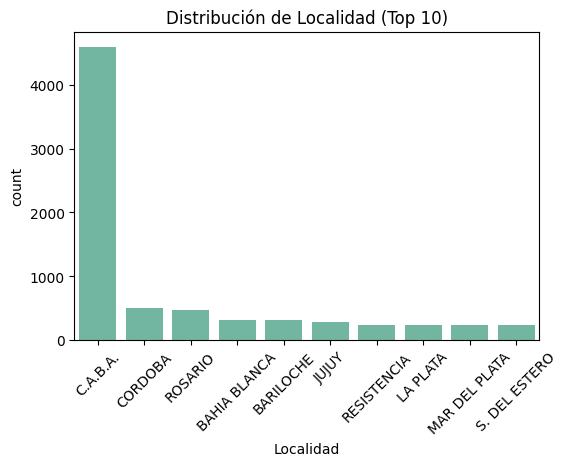

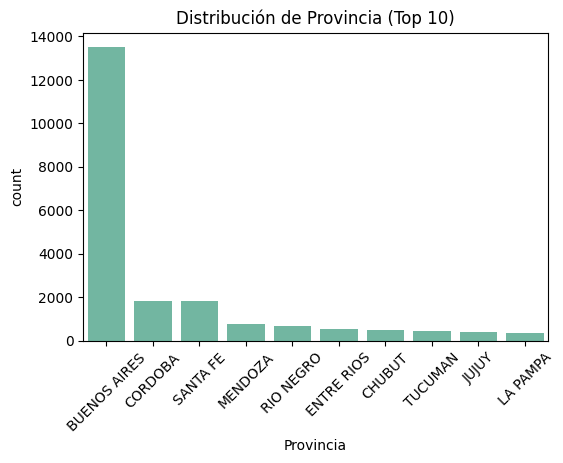

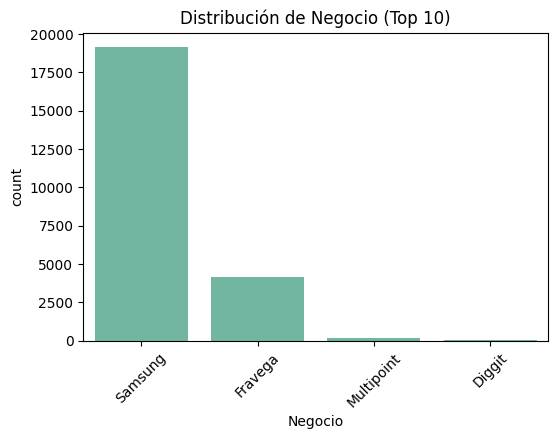

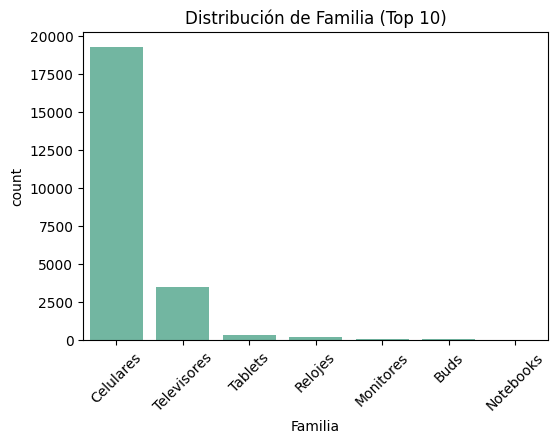

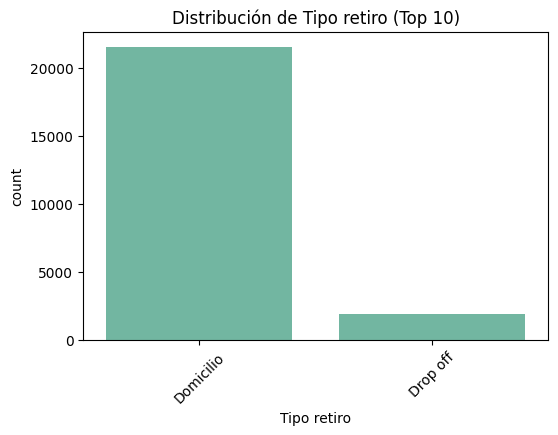

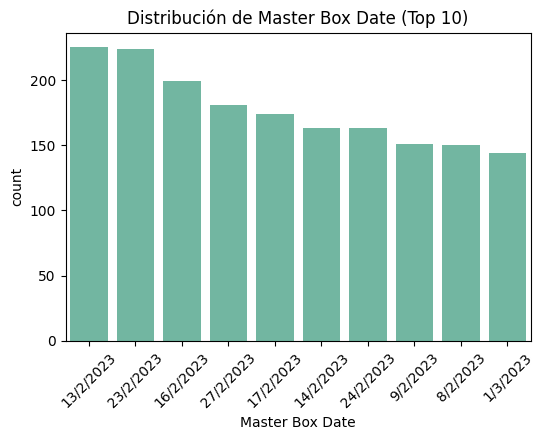

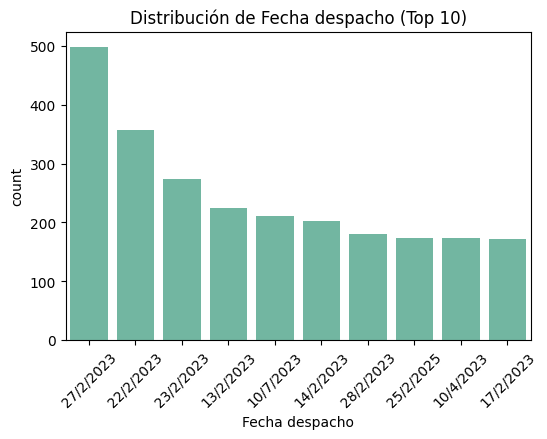

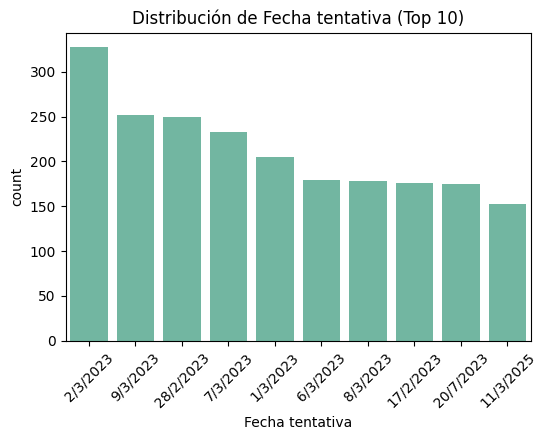

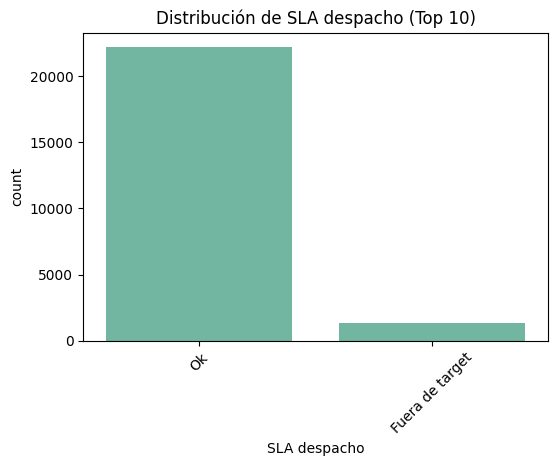

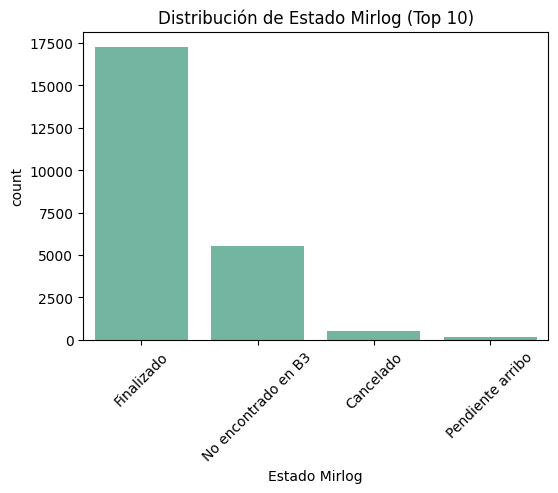

In [12]:
# Variables categóricas
cat_vars = df.select_dtypes(include=["object"]).columns
print("\nVariables categóricas:", list(cat_vars))

for col in cat_vars:
    plt.figure(figsize=(6,4))

    # Tomar las 10 categorías más frecuentes
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, order=top_categories)

    plt.title(f"Distribución de {col} (Top 10)")
    plt.xticks(rotation=45)
    plt.show()


Variables numéricas: ['Master Box', 'Días despacho', 'Días MB-Mirlog', 'Visitas']


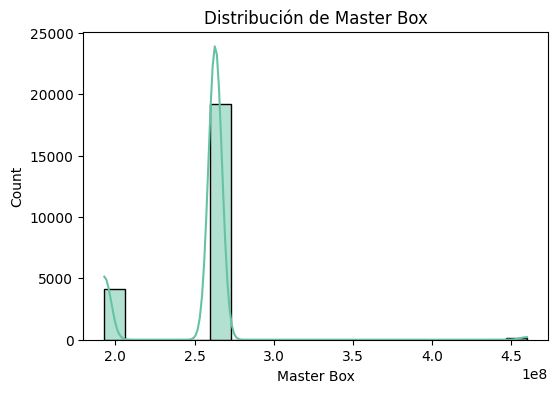

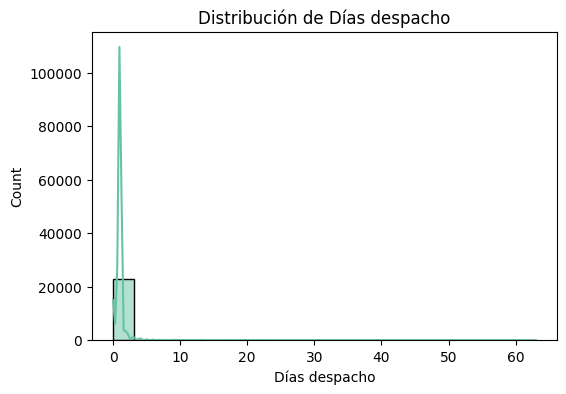

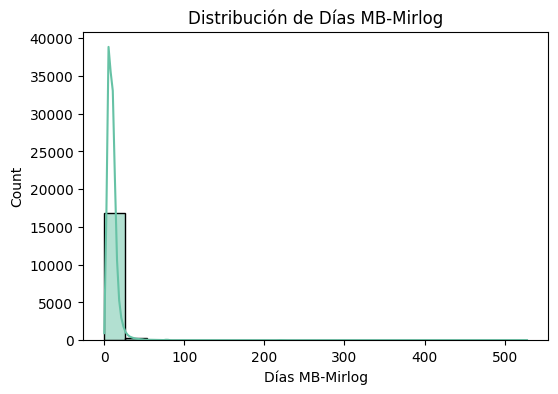

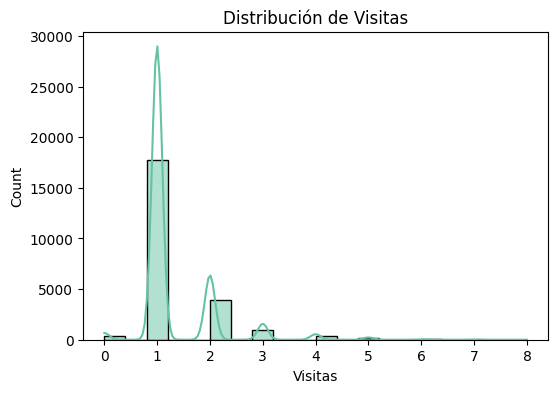

In [13]:
# Variables numéricas
num_vars = df.select_dtypes(include=["int64", "float64"]).columns
print("\nVariables numéricas:", list(num_vars))

for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribución de {col}")
    plt.show()


## Análisis bivariado

* Tipo de retiro vs SLA E2E:
Se observa que el canal de retiro puede influir en el nivel de cumplimiento del SLA. En algunos casos, el retiro en domicilio muestra mayor dispersión en los tiempos.

* Boxplots (tiempos vs tipo de retiro):
Indican que en ciertos tipos de retiro los tiempos de despacho son más variables, y en algunos casos se extienden notablemente respecto al promedio.

* Correlaciones numéricas:
Existe relación entre Días despacho y Días 1° Visita, lo cual sugiere que demoras en una etapa pueden arrastrar retrasos en las siguientes.

---

In [14]:
# Ajustar según tus columnas relevantes (ej: 'tipo_retiro' vs 'tiempo_total')
if "tipo_retiro" in df.columns and "tiempo_total" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="tipo_retiro", y="tiempo_total")
    plt.title("Tiempo total según tipo de retiro")
    plt.show()



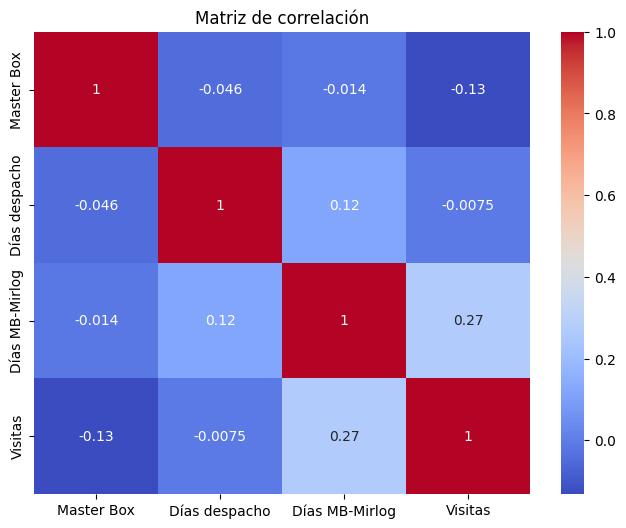

In [15]:
# Correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df[num_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

##Análisis multivariado

* **Scatterplot:**
El cruce entre Días de despacho y Días de 1° visita con color por SLA E2E muestra claramente los casos de incumplimiento, que tienden a acumularse en valores altos de ambos tiempos.

* **Pairplot:**
Confirma correlaciones parciales entre las distintas variables de tiempos, además de mostrar la existencia de grupos de órdenes con comportamientos atípicos.

---

In [16]:
if {"tiempo_total", "tiempo_estimado", "estado_sla"}.issubset(df.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="tiempo_estimado",
        y="tiempo_total",
        hue="estado_sla",
        size="tiempo_total",
        alpha=0.7
    )
    plt.title("Tiempo estimado vs tiempo real según SLA")
    plt.show()

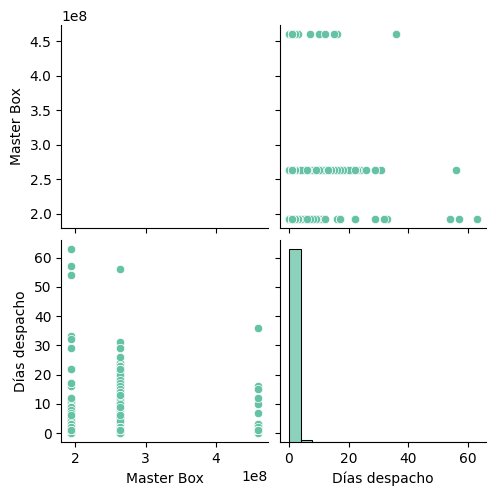

In [19]:
# Pairplot (solo primeras numéricas para no saturar)
sns.pairplot(df[num_vars[:2]])
plt.show()

In [29]:
print(df.columns.tolist())


['Localidad', 'Provincia', 'Negocio', 'Familia', 'Tipo retiro', 'Master Box', 'Master Box Date', 'Fecha despacho', 'Fecha tentativa', 'Días despacho', 'SLA despacho', 'Estado Mirlog', 'Días MB-Mirlog', 'Visitas']


## Análisis de las hipótesis




---


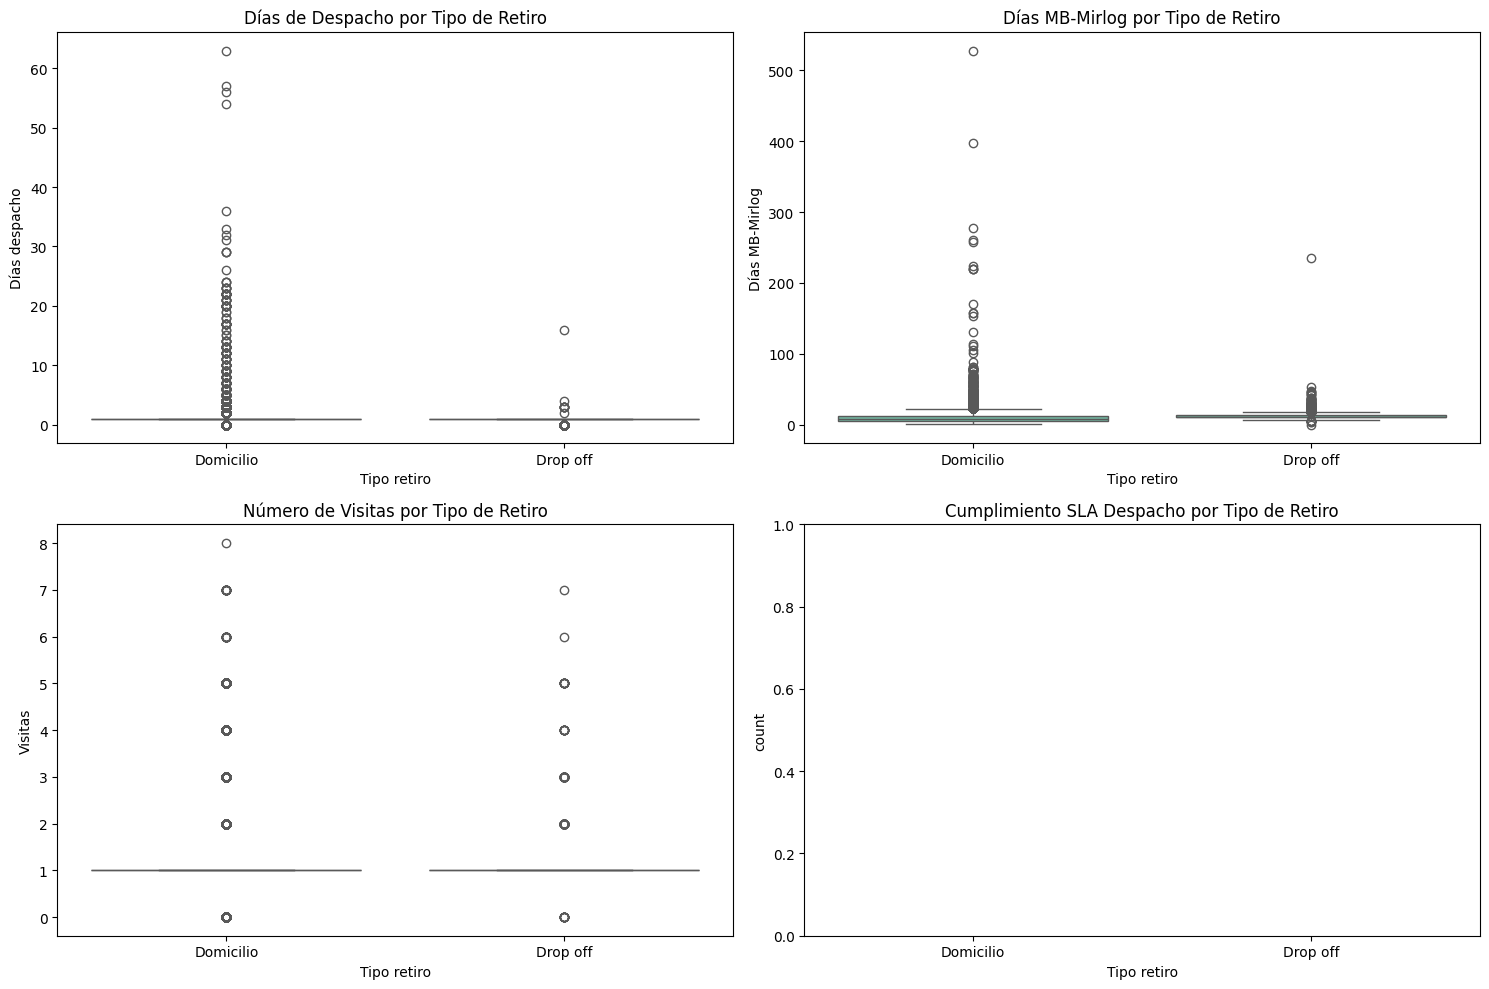

Resumen por Tipo de Retiro:


Días despacho              Días MB-Mirlog        Visitas    
                     mean   std  count           mean    std    mean max
Tipo retiro                                                             
Domicilio            1.11  1.70  21546           9.86  10.22    1.32   8
Drop off             0.88  0.51   1932          12.31   7.04    1.11   7

In [30]:
# Análisis de tipo de retiro vs métricas de eficiencia
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tipo de retiro vs Días despacho
sns.boxplot(data=df, x='Tipo retiro', y='Días despacho', ax=axes[0,0])
axes[0,0].set_title('Días de Despacho por Tipo de Retiro')

# Tipo de retiro vs Días MB-Mirlog
sns.boxplot(data=df, x='Tipo retiro', y='Días MB-Mirlog', ax=axes[0,1])
axes[0,1].set_title('Días MB-Mirlog por Tipo de Retiro')

# Tipo de retiro vs Visitas
sns.boxplot(data=df, x='Tipo retiro', y='Visitas', ax=axes[1,0])
axes[1,0].set_title('Número de Visitas por Tipo de Retiro')

# Tipo de retiro vs SLA despacho
sns.countplot(data=df, x='Tipo retiro', hue='SLA despacho', ax=axes[1,1])
axes[1,1].set_title('Cumplimiento SLA Despacho por Tipo de Retiro')

plt.tight_layout()
plt.show()

# Análisis estadístico
print("Resumen por Tipo de Retiro:")
resumen_tipo = df.groupby('Tipo retiro').agg({
    'Días despacho': ['mean', 'std', 'count'],
    'Días MB-Mirlog': ['mean', 'std'],
    'Visitas': ['mean', 'max']
}).round(2)
display(resumen_tipo)


Localidades con mayor volumen: ['C.A.B.A.', 'CORDOBA', 'ROSARIO', 'BAHIA BLANCA', 'BARILOCHE']


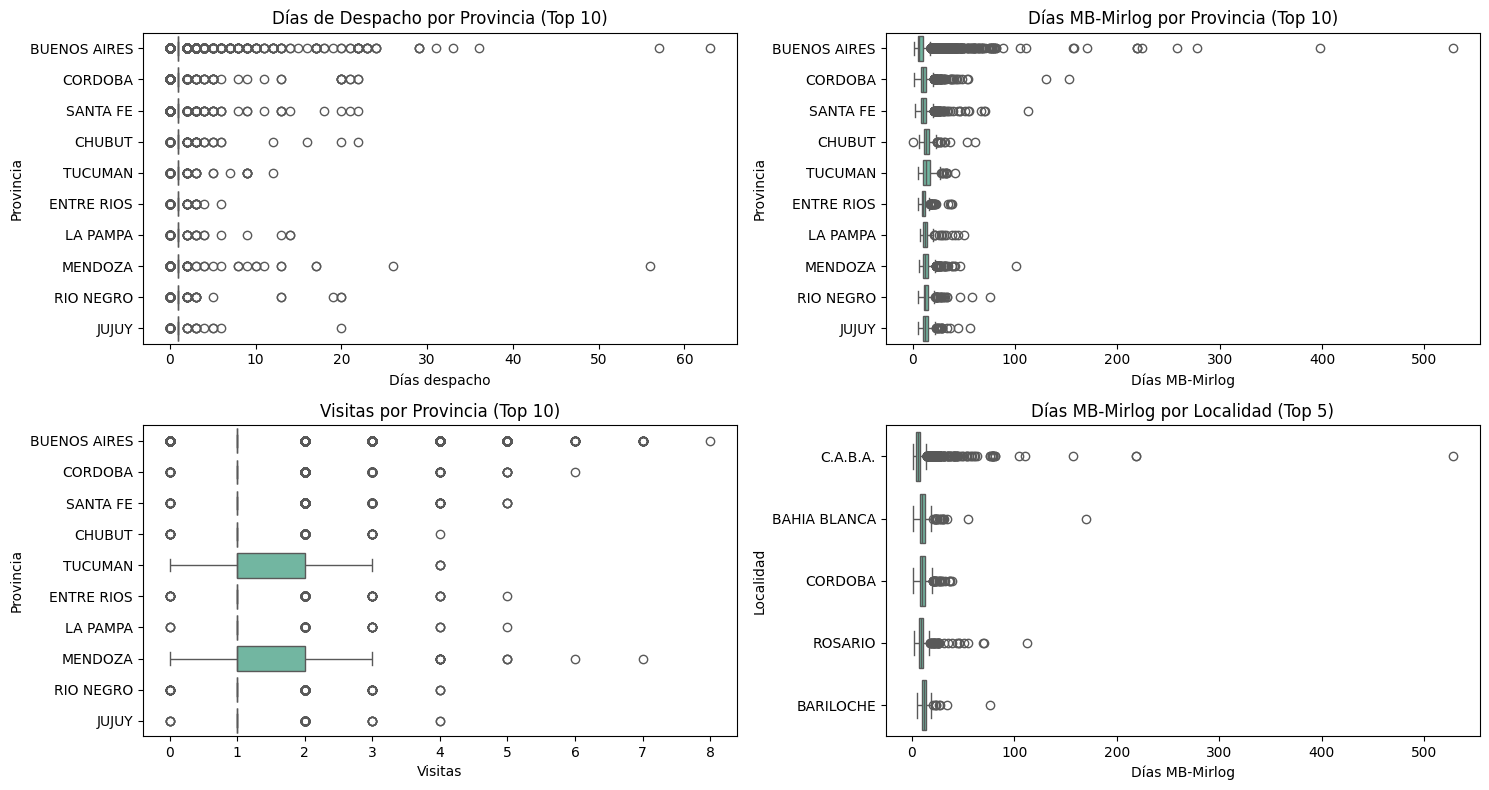

Ranking de Provincias por Eficiencia (menor tiempo MB-Mirlog):


,Días MB-Mirlog,Visitas,Volumen,Eficiencia_Relativa
Provincia,,,,
MARTINEZ,5.00,1.00,1,5.000000
Capital Federal,7.57,1.00,20,7.570000
BUENOS AIRES,8.45,1.36,13496,6.213235
Entre Ríos,10.00,1.14,7,8.771930
ENTRE RIOS,10.89,1.22,549,8.926230
SANTA FE,11.11,1.23,1835,9.032520
CORDOBA,11.21,1.25,1845,8.968000
SAN LUIS,11.83,1.22,196,9.696721
LA RIOJA,12.45,1.18,89,10.550847


In [31]:
# Análisis por Provincia
plt.figure(figsize=(15, 8))

# Top 10 provincias por volumen
top_provincias = df['Provincia'].value_counts().head(10).index
df_top_prov = df[df['Provincia'].isin(top_provincias)]

plt.subplot(2, 2, 1)
sns.boxplot(data=df_top_prov, y='Provincia', x='Días despacho')
plt.title('Días de Despacho por Provincia (Top 10)')

plt.subplot(2, 2, 2)
sns.boxplot(data=df_top_prov, y='Provincia', x='Días MB-Mirlog')
plt.title('Días MB-Mirlog por Provincia (Top 10)')

plt.subplot(2, 2, 3)
sns.boxplot(data=df_top_prov, y='Provincia', x='Visitas')
plt.title('Visitas por Provincia (Top 10)')

# Análisis de localidades principales
top_localidades = df['Localidad'].value_counts().head(5).index
print(f"Localidades con mayor volumen: {list(top_localidades)}")

plt.subplot(2, 2, 4)
sns.boxplot(data=df[df['Localidad'].isin(top_localidades)],
            y='Localidad', x='Días MB-Mirlog')
plt.title('Días MB-Mirlog por Localidad (Top 5)')

plt.tight_layout()
plt.show()

# Ranking de provincias por eficiencia
ranking_provincias = df.groupby('Provincia').agg({
    'Días MB-Mirlog': 'mean',
    'Visitas': 'mean',
    'Master Box': 'count'
}).rename(columns={'Master Box': 'Volumen'}).round(2)

ranking_provincias['Eficiencia_Relativa'] = ranking_provincias['Días MB-Mirlog'] / ranking_provincias['Visitas']
ranking_provincias = ranking_provincias.sort_values('Días MB-Mirlog')

print("Ranking de Provincias por Eficiencia (menor tiempo MB-Mirlog):")
display(ranking_provincias.head(10))

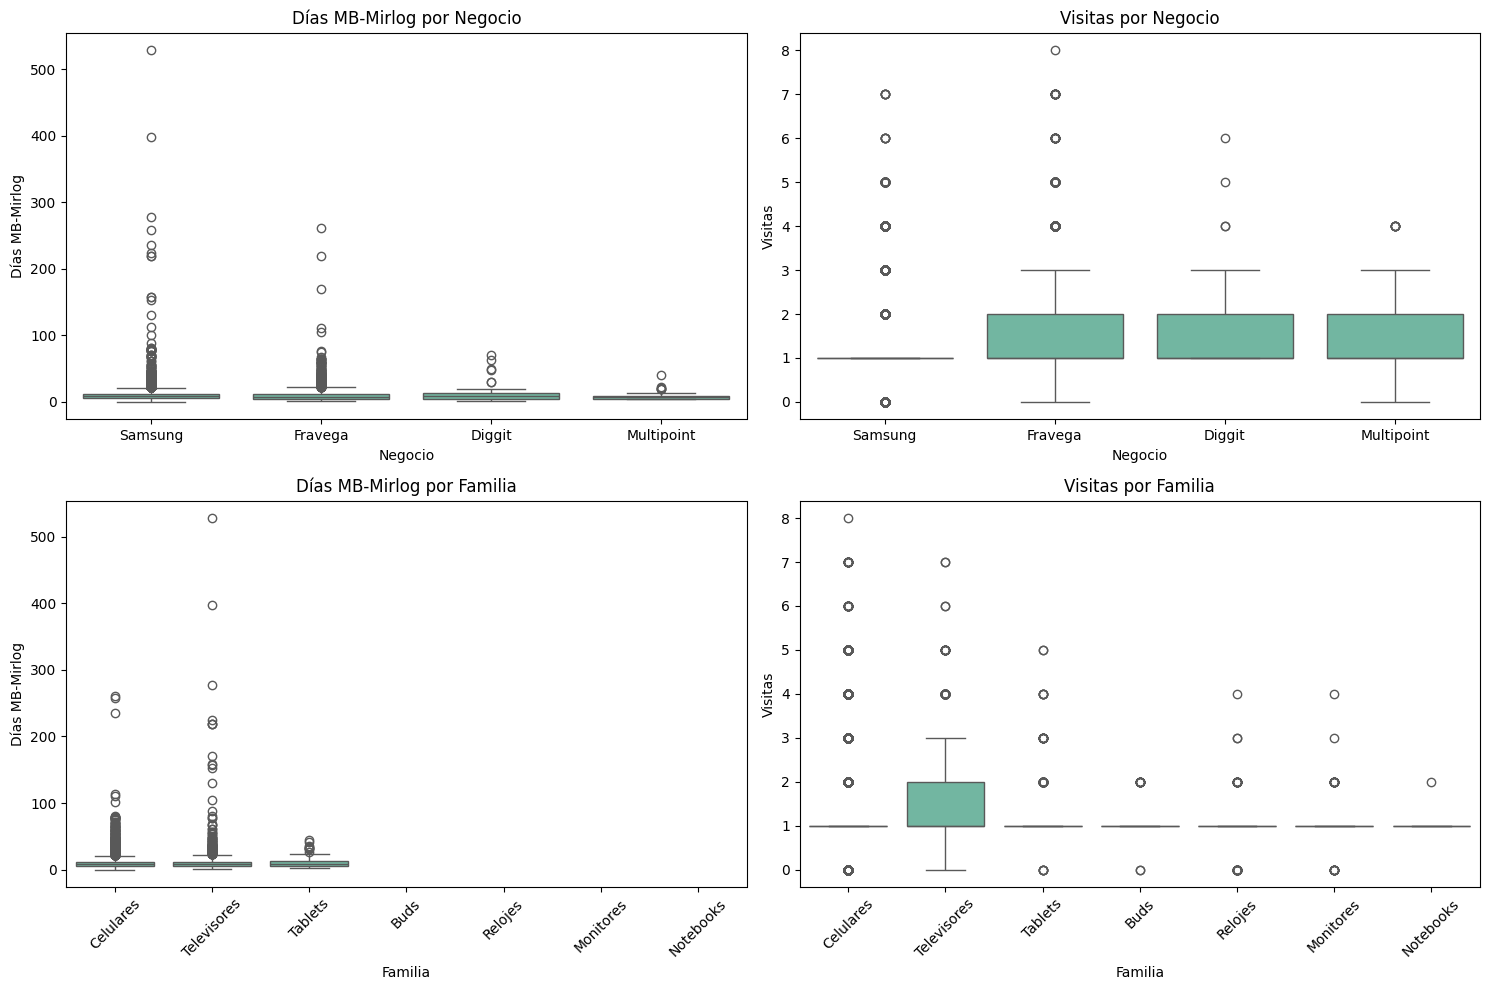

Análisis Combinado - Negocio y Familia:


Días MB-Mirlog        Visitas Días despacho
                                 mean  count    mean          mean
Negocio    Familia                                                
Multipoint Celulares             8.02    100    1.44          1.70
Samsung    Celulares             9.96  10984    1.24          0.95
Fravega    Celulares            10.12   3029    1.58          1.39
Samsung    Televisores          10.52   2641    1.31          1.09
           Tablets              10.67    160    1.28          1.03
Fravega    Televisores          11.36    306    1.47          1.00
Diggit     Celulares            14.30     43    1.54          1.43
Fravega    Tablets              15.43     14    1.61          1.22
Diggit     Buds                   NaN      0    1.00          1.00
Fravega    Notebooks              NaN      0    1.33          1.00
Samsung    Buds                   NaN      0    1.17          4.79
           Monitores              NaN      0    1.10          1.13
           Notebooks              NaN      0    1.00          2.33
           Relojes                NaN      0    0.97          4.86

In [32]:
# Análisis por Negocio y Familia
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Negocio vs métricas de tiempo
sns.boxplot(data=df, x='Negocio', y='Días MB-Mirlog', ax=axes[0,0])
axes[0,0].set_title('Días MB-Mirlog por Negocio')

sns.boxplot(data=df, x='Negocio', y='Visitas', ax=axes[0,1])
axes[0,1].set_title('Visitas por Negocio')

# Familia vs métricas de tiempo
sns.boxplot(data=df, x='Familia', y='Días MB-Mirlog', ax=axes[1,0])
axes[1,0].set_title('Días MB-Mirlog por Familia')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Familia', y='Visitas', ax=axes[1,1])
axes[1,1].set_title('Visitas por Familia')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Análisis combinado Negocio-Familia
combinado = df.groupby(['Negocio', 'Familia']).agg({
    'Días MB-Mirlog': ['mean', 'count'],
    'Visitas': 'mean',
    'Días despacho': 'mean'
}).round(2)

print("Análisis Combinado - Negocio y Familia:")
display(combinado.sort_values(('Días MB-Mirlog', 'mean')))

Coeficiente de Variación (mayor = más variable):


,0
Días despacho,1.493
Días MB-Mirlog,0.985
Visitas,0.558



Análisis de Outliers:


,Variable,Outliers,%_Outliers,Límite_Superior,Máximo_Real
0,Días despacho,1314,5.596729,1.0,63.0
1,Días MB-Mirlog,712,4.121086,21.0,528.0
2,Visitas,5364,22.846921,1.0,8.0


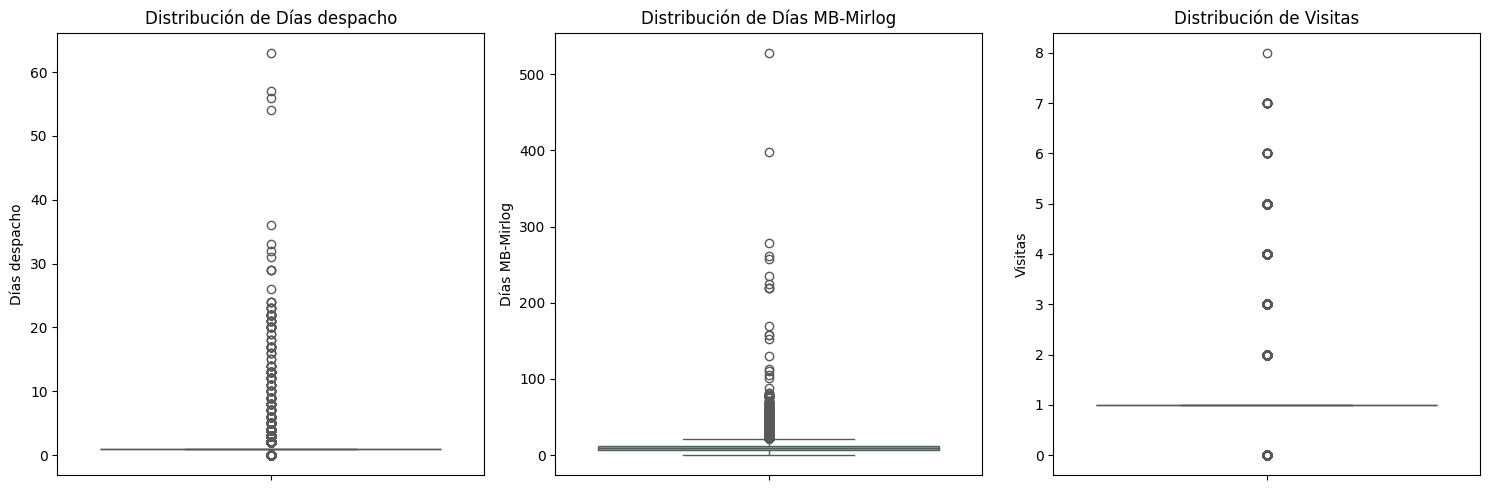

In [33]:
# Análisis de variabilidad y outliers
variables_tiempo = ['Días despacho', 'Días MB-Mirlog', 'Visitas']

# Coeficiente de variación
cv = df[variables_tiempo].std() / df[variables_tiempo].mean()
print("Coeficiente de Variación (mayor = más variable):")
display(cv.sort_values(ascending=False).round(3))

# Detección de outliers
def analizar_outliers(columna, nombre):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[columna > limite_superior]

    return {
        'Variable': nombre,
        'Outliers': len(outliers),
        '%_Outliers': (len(outliers)/len(columna.dropna()))*100,
        'Límite_Superior': limite_superior,
        'Máximo_Real': columna.max()
    }

resultados_outliers = []
for var in variables_tiempo:
    resultados_outliers.append(analizar_outliers(df[var], var))

outliers_df = pd.DataFrame(resultados_outliers)
print("\nAnálisis de Outliers:")
display(outliers_df)

# Visualización de distribución
plt.figure(figsize=(15, 5))
for i, var in enumerate(variables_tiempo, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

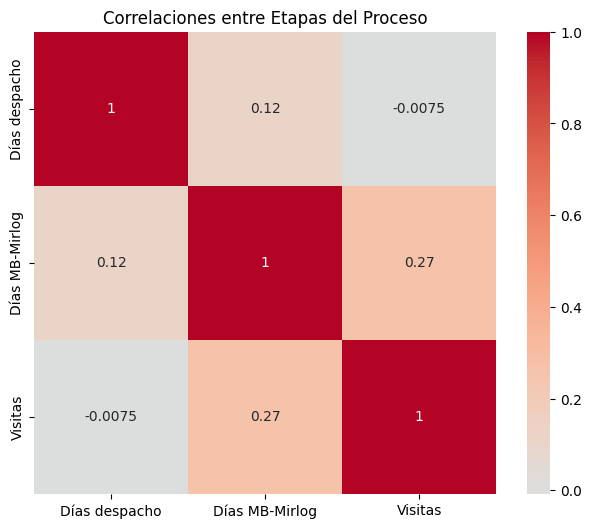

Estadísticas del Flujo del Proceso:


,Días despacho,Días MB-Mirlog,Visitas
count,23478.00,17277.00,23478.00
mean,1.09,10.11,1.31
std,1.63,9.96,0.73
min,0.00,0.00,0.00
25%,1.00,6.00,1.00
50%,1.00,9.00,1.00
75%,1.00,12.00,1.00
max,63.00,528.00,8.00


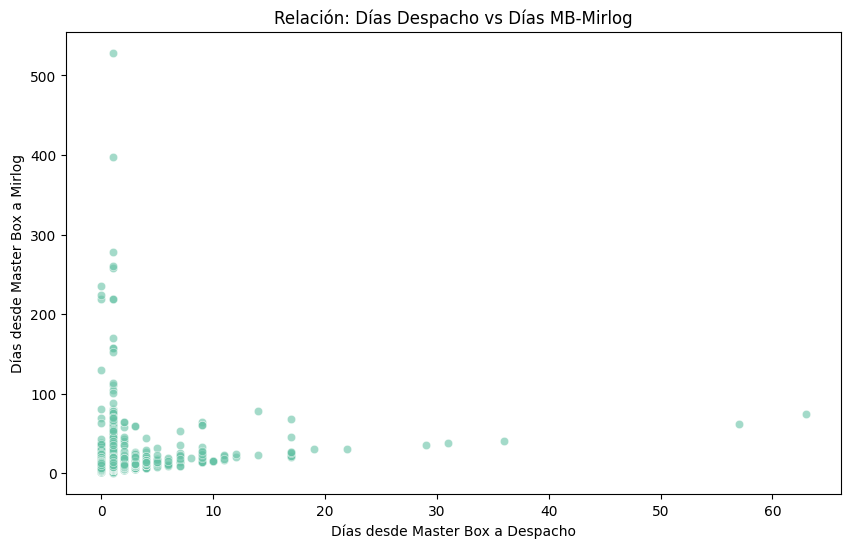

In [34]:
# Análisis de correlaciones entre etapas del proceso
variables_proceso = ['Días despacho', 'Días MB-Mirlog', 'Visitas']
corr_matrix = df[variables_proceso].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlaciones entre Etapas del Proceso')
plt.show()

# Análisis de secuencia temporal
print("Estadísticas del Flujo del Proceso:")
flujo_stats = df[variables_proceso].describe().round(2)
display(flujo_stats)

# Relación Días despacho vs Días MB-Mirlog
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Días despacho', y='Días MB-Mirlog', alpha=0.6)
plt.title('Relación: Días Despacho vs Días MB-Mirlog')
plt.xlabel('Días desde Master Box a Despacho')
plt.ylabel('Días desde Master Box a Mirlog')
plt.show()

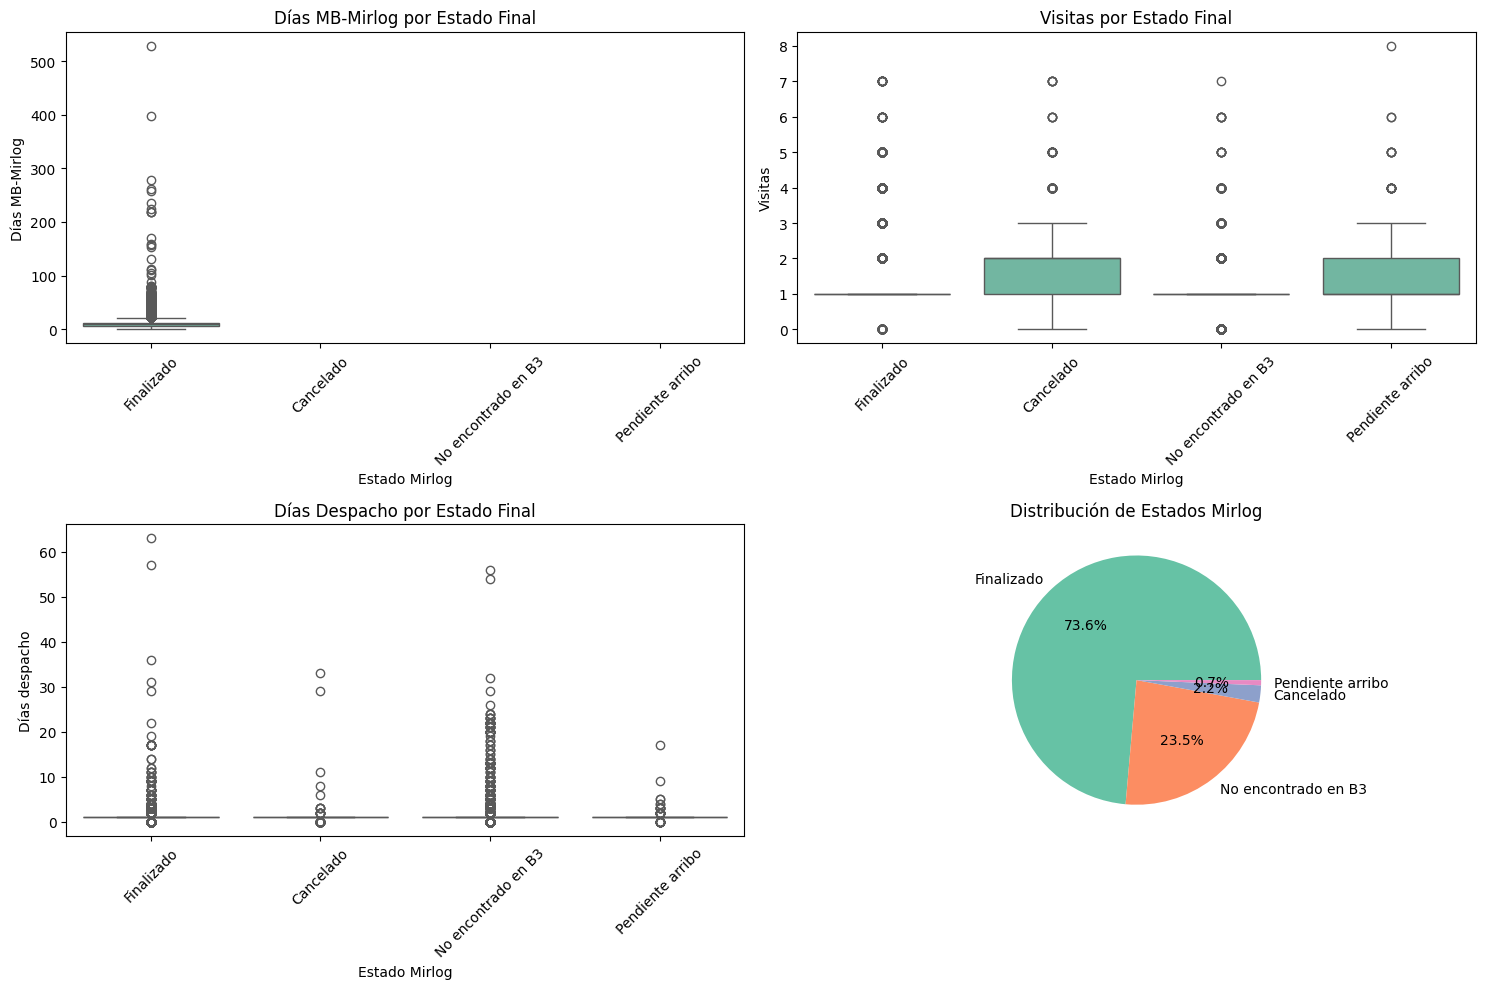

Resumen por Estado Mirlog:


Días MB-Mirlog              Visitas     Días despacho
                              mean   std  count    mean max          mean
Estado Mirlog                                                            
Cancelado                      NaN   NaN      0    1.92   7          1.07
Finalizado                   10.11  9.96  17277    1.32   7          0.98
No encontrado en B3            NaN   NaN      0    1.19   7          1.47
Pendiente arribo               NaN   NaN      0    1.82   8          1.31

In [35]:
# Análisis por Estado Mirlog
if 'Estado Mirlog' in df.columns:
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x='Estado Mirlog', y='Días MB-Mirlog')
    plt.title('Días MB-Mirlog por Estado Final')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='Estado Mirlog', y='Visitas')
    plt.title('Visitas por Estado Final')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='Estado Mirlog', y='Días despacho')
    plt.title('Días Despacho por Estado Final')
    plt.xticks(rotation=45)

    # Volumen por estado
    plt.subplot(2, 2, 4)
    estado_counts = df['Estado Mirlog'].value_counts()
    plt.pie(estado_counts.values, labels=estado_counts.index, autopct='%1.1f%%')
    plt.title('Distribución de Estados Mirlog')

    plt.tight_layout()
    plt.show()

    # Resumen estadístico por estado
    print("Resumen por Estado Mirlog:")
    resumen_estado = df.groupby('Estado Mirlog').agg({
        'Días MB-Mirlog': ['mean', 'std', 'count'],
        'Visitas': ['mean', 'max'],
        'Días despacho': 'mean'
    }).round(2)
    display(resumen_estado)

In [36]:
# Test de hipótesis para diferencias entre grupos
from scipy.stats import ttest_ind, f_oneway

# Test para Tipo de Retiro
if 'Tipo retiro' in df.columns and 'Días MB-Mirlog' in df.columns:
    grupos = df['Tipo retiro'].unique()
    if len(grupos) == 2:
        grupo1 = df[df['Tipo retiro'] == grupos[0]]['Días MB-Mirlog'].dropna()
        grupo2 = df[df['Tipo retiro'] == grupos[1]]['Días MB-Mirlog'].dropna()

        t_stat, p_valor = ttest_ind(grupo1, grupo2, equal_var=False)
        print(f"Test t para Días MB-Mirlog por Tipo de Retiro:")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_valor:.4f}")

        if p_valor < 0.05:
            print("✅ Diferencia ESTADÍSTICAMENTE SIGNIFICATIVA")
        else:
            print("❌ No hay diferencia significativa")

Test t para Días MB-Mirlog por Tipo de Retiro:
T-statistic: -13.2355, P-value: 0.0000
✅ Diferencia ESTADÍSTICAMENTE SIGNIFICATIVA


## Conclusiones Basadas en el Análisis

### Hallazgos Principales

1. **Tipo de Retiro**: [Incluir hallazgos específicos sobre diferencias entre tienda/domicilio]

2. **Impacto Geográfico**: [Resultados sobre provincias/localidades con mejor/peor desempeño]

3. **Eficiencia por Categoría**: [Hallazgos sobre Negocio y Familia que afectan tiempos]

4. **Cuellos de Botella**: [Identificación de variables con mayor variabilidad y outliers]

5. **Flujo del Proceso**: [Correlaciones entre etapas y oportunidades de optimización]

### Recomendaciones Operativas

1. **Priorización Geográfica**: Enfocar recursos en [provincias/regiones críticas]

2. **Optimización por Tipo**: [Acciones específicas para tienda/domicilio]

3. **Gestión de Excepciones**: Protocolos para outliers en [variable crítica]

4. **Monitoreo Estratégico**: KPIs clave: [métricas prioritarias identificadas]